In [10]:
import numpy as np
import matplotlib.pyplot as plt
from MOBO_SIM import BayesianOptimization

def run_multiple_optimizations(bo_function, n):
    hypervolumes = {
        'random': [],
        'qparego': [],
        'qehvi': [],
        'qnehvi': []
    }

    for _ in range(n):
        random, qparego, qehvi, qnehvi = bo_function()
        
        hypervolumes['random'].append(random)
        hypervolumes['qparego'].append(qparego)
        hypervolumes['qehvi'].append(qehvi)
        hypervolumes['qnehvi'].append(qnehvi)
    
    stats = {}
    for key in hypervolumes:
        hypervolumes[key] = np.array(hypervolumes[key])
        mean_hypervolume = np.mean(hypervolumes[key], axis=0)
        std_hypervolume = np.std(hypervolumes[key], axis=0)
        stats[key] = (mean_hypervolume, std_hypervolume)

    return stats

In [26]:
def plot_results(stats):
    plt.figure(figsize=(12, 8))
    
    for key, (mean_hypervolume, std_hypervolume) in stats.items():
        x = np.arange(len(mean_hypervolume))
        plt.errorbar(x, mean_hypervolume, yerr=std_hypervolume, label=key, capsize=5, marker='o')
    
    plt.axhline(y=59.36011874867746, color='black', linestyle='--', label='Max Hypervolume')
    
    plt.xlabel('Batch', fontsize=14)
    plt.ylabel('Hypervolume', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

In [16]:
def example_bo_function():
    bo = BayesianOptimization(BATCH_SIZE=5, N_BATCH=10, INITIAL_SAMPLES=10)
    return bo.run_optimization()

In [17]:
n = 10  # Number of runs
stats = run_multiple_optimizations(example_bo_function, n)


Batch  1: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (25.80, 0.00, 2.37, 0.00), time = 29.51.
Batch  2: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (25.80, 17.73, 38.01, 14.27), time = 34.67.
Batch  3: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 37.64, 47.19, 24.50), time = 32.48.
Batch  4: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 48.39, 51.07, 33.80), time = 33.13.
Batch  5: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 50.65, 51.44, 46.52), time = 33.91.
Batch  6: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 52.31, 54.33, 52.21), time = 38.99.
Batch  7: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 52.31, 54.69, 52.91), time = 71.99.
Batch  8: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 53.39, 54.77, 55.37), time = 62.84.
Batch  9: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 53.52, 55.92, 56.11), time = 59.57.
Batch 10: Hypervolume (random, qNParEGO, qEHVI, qNEHVI) = (27.34, 53.52, 56.25, 56.1

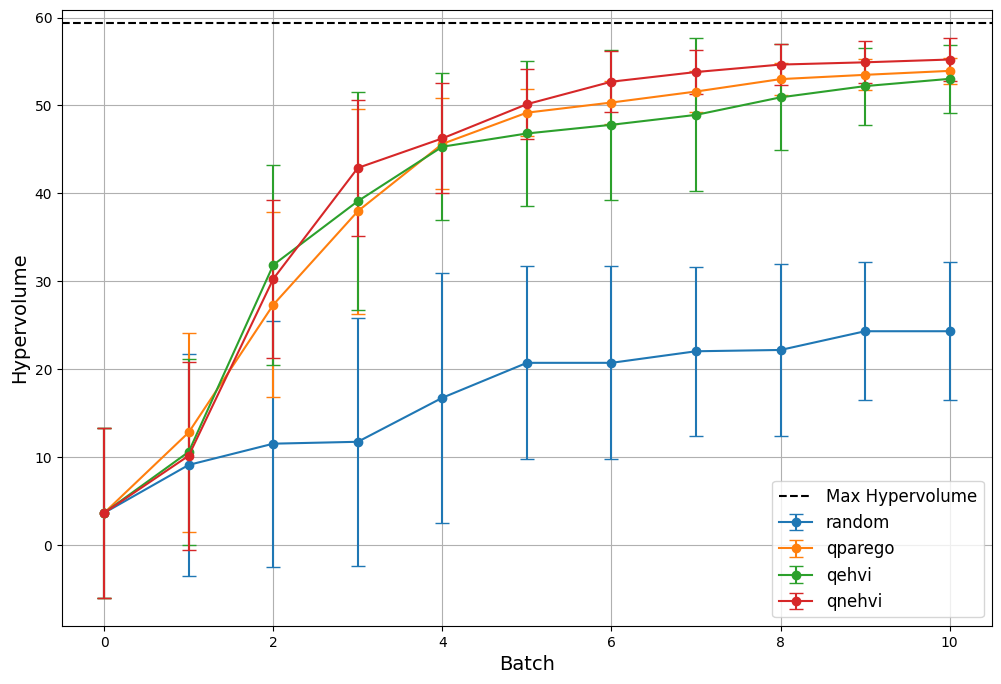

In [27]:
plot_results(stats)
